In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Práctica 2
### Miguel Alfonso Zapata De La Cruz

<img src= 'Practica_2_1.jpg' width="600px">

### Generate Correlated Data in 2D

In [3]:
## First, we  generate the 2d box with 1000 random points: 
N1 = 1000 # Number of random points
h1 = 100 # height 
w1 = 100 # width
def f_rand(N,w,h): 
    s = [[], []]
    for i in range(N):
        x = np.random.uniform(0,w)
        y = np.random.uniform(0,h)  
        x = x % w # periodicity condition
        y = y % h
        s[0].append(x)
        s[1].append(y)
    return s

R = f_rand(N1,w1,h1)


(0.0, 100.0)

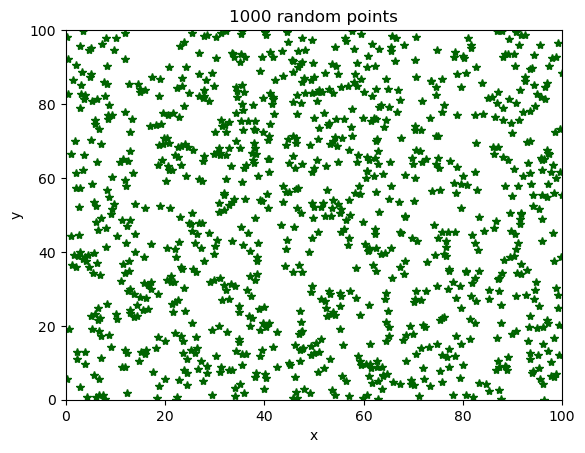

In [4]:
# the plot is the following
X_rand = R[0]
Y_rand = R[1]
plt.plot(X_rand,Y_rand,'*',c='darkgreen')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1000 random points')
plt.xlim(0, w1)
plt.ylim(0, h1)

In [5]:
c_num = 20 # number of circumference 
r = 30 # radius 

# we generate the centers of the circumference with the same random function
c =f_rand(c_num,w1,h1) 

In [6]:
# for a better organization, the number of the points per circumference     is
z = N1 //c_num
# the center's generator function is 
def f_centers(center_x,center_y,rad,n_z ):
    s = [[], []]
    for _ in range(n_z):
        theta = np.random.uniform(0,2*np.pi)
        x, y = center_x + rad*np.cos(theta), center_y + rad*np.sin(theta)
        x, y  = x%w1, y%h1
        s[0].append(x),s[1].append(y)
    return s

In [7]:
D = [[], []]
# the center's organization si given by 
for i in range(c_num):
    n = f_centers(c[0][i], c[1][i],r,z)
    D[0].extend(n[0]), D[1].extend(n[1])
    

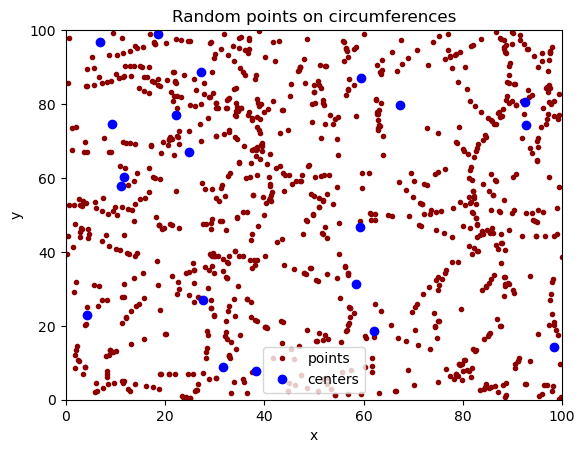

In [8]:
D[0].extend(c[0])
D[1].extend(c[1])
# the plot is 
D_x = D[0]
D_y = D[1]
c_x = c[0]
c_y = c[1]
plt.plot(D_x, D_y,'.',c='darkred',label='points')
plt.plot(c_x, c_y, 'o', c='blue',label='centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points on circumferences')
plt.xlim(0,w1)
plt.ylim(0,h1)
plt.legend()


In [9]:
# number of bins
N_b = 200 

# now, we define the function of the histogram, for this, first consider the maximun distance 
# between two points in the box
d_max = np.sqrt(100**2 + 100**2) 

def f_his(b,d):
    # for a better organization, the bin's distance is
    dis_b = d_max/b # where b is the number of the bins
    # in the same way, the centers of the bins can be organized like this 
    c_b = np.array([(dis_b/2) + (i*dis_b) for i in range(b)]) 
    # note that the frecuency of the histogram is 
    f = np.zeros(b)
    d_1 = len(d[0])
    for i in range(d_1):
        x_1, y_1 = d[0][i], d[1][i]
        for j in range(i+1, d_1):
            x_2, y_2 = d[0][j] ,  d[1][j]
            dis = np.sqrt((x_2 - x_1)**2 + (y_2 - y_1)**2)
            c_bin = int(dis/dis_b)
            f[c_bin]+=1 
    return [c_b,f] 




In [10]:
RR = f_his(N_b,R)
RR[1] = RR[1]/sum(RR[1])
sum(RR[1])

0.999999999999999

Text(0.5, 1.0, 'RR')

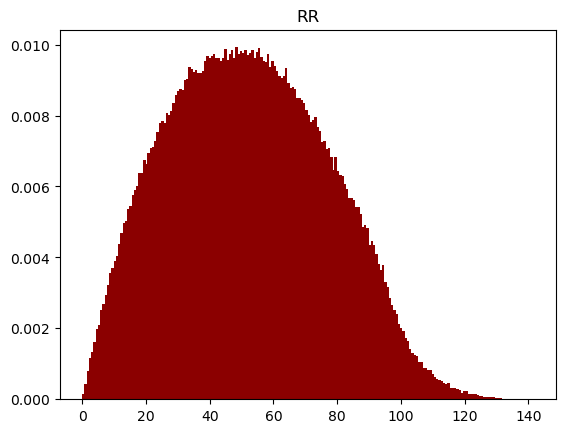

In [11]:
plt.bar(RR[0], RR[1], color='darkred')
plt.title('RR')

In [12]:
# now, we normalize the histogram
DD = f_his(N_b,D)
DD[1] = DD[1]/sum(DD[1])
# check the norm of the histogram
sum(DD[1])

0.9999999999999997

Text(0.5, 1.0, 'DD')

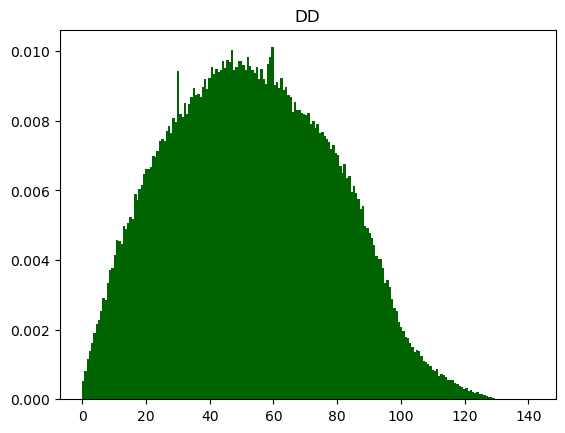

In [13]:
# the plot is 
plt.bar(DD[0], DD[1], color='darkgreen')
plt.title('DD')

In [14]:
# in an analogous way, we define a function for two sets 
def f_dr(b,sa,sc):
   # for a better organization, the bin's distance is
    dis_b = d_max/b # where b is the number of the bins
    # in the same way, the centers of the bins can be organized like this 
    c_b = np.array([(dis_b/2) + (i*dis_b) for i in range(b)]) 
    # note that the frecuency of the histogram is 
    f = np.zeros(b)
    for x_1, y_1 in zip(sa[0], sa[1]):
        for x_2, y_2 in zip(sc[0], sc[1]):
            dis_dr = np.sqrt((x_2 - x_1)**2 + (y_2 - y_1)**2)
            c_bin = int(dis_dr/dis_b)
            f[c_bin]+=1
    return [c_b, f]
# the normalization of ths histogram DR is 
DR = f_dr(N_b,D,R)
DR[1] = DR[1]/sum(DR[1])
sum(DR[1])

0.9999999999999999

Text(0.5, 1.0, 'DR')

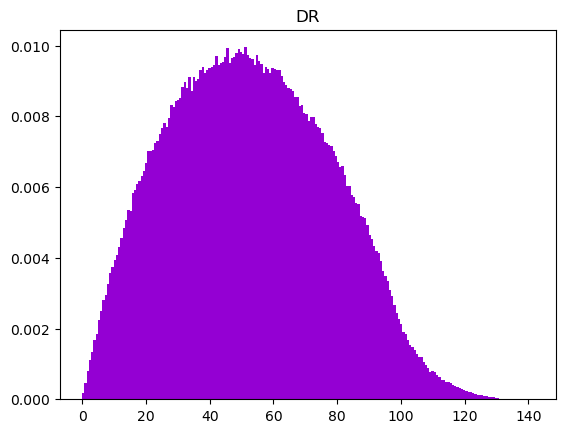

In [15]:
# the plot is 
DR_x = DR[0]
DR_y = DR[1]
plt.bar(DR_x, DR_y, color='darkviolet')
plt.title('DR')


In [16]:
# now we define the functions for the different estimators 

# Pebbles-Hauser estimator is
def f_ph(DD_x,RR_x):
    DD_x[1] = DD_x[1]/sum(DD_x[1]) 
    RR_x[1] = RR_x[1]/sum(RR_x[1])
    dd = DD_x[1]
    rr = RR_x[1]
    return dd/rr -1


# Davis-Pebbles estimator is
def f_dp(DD_x,DR_x):
    dd = DD_x[1]
    dr = DR_x[1]
    return dd/dr -1

# Hamilton estimator is
def f_h(DD_x,RR_x,DR_x):
    dd = DD_x[1]
    rr = RR_x[1]
    dr = DR_x[1]
    return (dd*rr)/(dr**2)-1


# Landy-Szalay estimator is
def f_ls(DD_x,RR_x,DR_x):
    dd = DD_x[1]
    rr = RR_x[1]
    dr = DR_x[1]
    return (dd - 2*dr +rr)/rr




In [17]:

est_ph = f_ph(DD,RR)
est_dp = f_dp(DD,DR)
est_h  = f_h(DD,RR,DR) 
est_ls = f_ls(DD,RR,DR)


/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: invalid value encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:16: RuntimeWarning: invalid value encountered in true_divide
  return dd/dr -1
/tmp/ipykernel_8799/3403468329.py:23: RuntimeWarning: invalid value encountered in true_divide
  return (dd*rr)/(dr**2)-1
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return (dd - 2*dr +rr)/rr
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: invalid value encountered in true_divide
  return (dd - 2*dr +rr)/rr


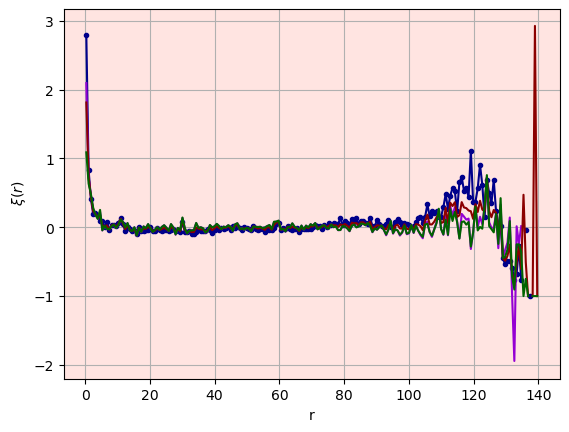

In [18]:
dd_0 = DD[0]
fig, ax = plt.subplots()

ax.plot(dd_0,est_ph,'.',color='darkblue', linestyle='-', label='Peebles-Hauser estimator')
ax.plot(dd_0,est_ls, color='darkviolet',linestyle='-',label='Landy-Szalay estimator')
ax.plot(dd_0,est_dp, color='darkred', linestyle='-', label='Davis-Peebles estimator')
ax.plot(dd_0,est_h , color='darkgreen',  linestyle='-',label='Hamilton estimator')
ax.set_facecolor('mistyrose')
ax.set_xlabel('r')
ax.set_ylabel(' $\\xi (r)$ ')
ax.grid(True)

<img src= 'Practica_2_2.jpg' width="600px">

In [19]:
# 4) Test randoms 

## First, we generate the 2d box with 1000 random points: 
n_1 = 2000
n_2 = 5000
n_3 = 10000
h = 100 # height 
w = 100 # width


def f_rand1(n_1,h,w): 
    s = []
    for i in range(n_1):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s


def f_rand2(n_2,h,w): 
    s = []
    for i in range(n_2):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s

def f_rand3(n_3,h,w): 
    s = []
    for i in range(n_3):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s






(0.0, 100.0)

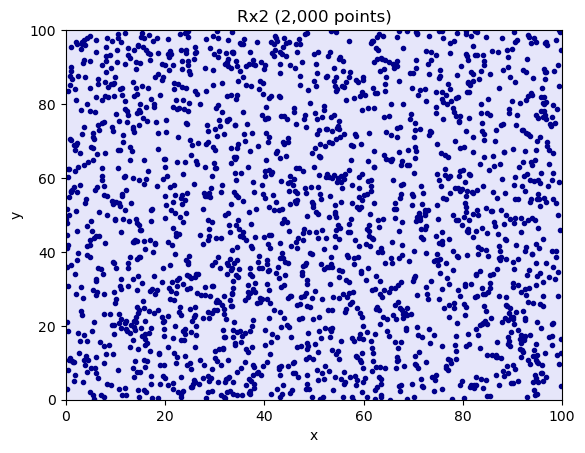

In [20]:
Rx2 = f_rand(2000,h1,w1)
fig, ax = plt.subplots()
ax.plot(Rx2[0], Rx2[1], '.', c='darkblue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rx2 (2,000 points)')
ax.set_xlim(0,w1)
ax.set_facecolor('lavender')
ax.set_ylim(0,h1)

(0.0, 100.0)

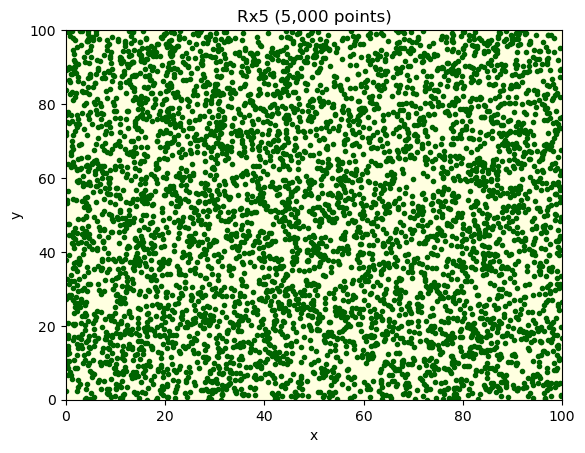

In [21]:
Rx5 = f_rand(5000,h1,w1)
fig, ax = plt.subplots()
ax.plot(Rx5[0], Rx5[1], '.', c='darkgreen')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rx5 (5,000 points)')
ax.set_xlim(0,w1)
ax.set_facecolor('lightyellow')
ax.set_ylim(0,h1)

(0.0, 100.0)

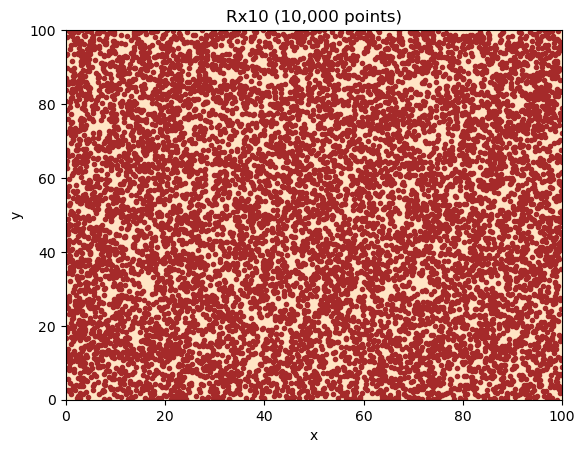

In [22]:
Rx10 = f_rand(10000,h1,w1)
fig, ax = plt.subplots()
ax.plot(Rx10[0], Rx10[1], '.', c='brown')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Rx10 (10,000 points)')
ax.set_xlim(0,w1)
ax.set_facecolor('bisque')
ax.set_ylim(0,h1)

In [23]:
# now we create the normalized histogram for each RRx
RRx2= f_his(N_b, Rx2)
RRx5= f_his(N_b, Rx5)
RRx10= f_his(N_b,Rx10)

RRx2[1] = RRx2[1]/sum(RRx2[1])
RRx5[1] = RRx5[1]/sum(RRx5[1])
RRx10[1] = RRx10[1]/sum(RRx10[1])

In [41]:
c_num = 20 # number of circumference 
r = 30 # radius 

# we generate the centers of the circumference with the same random function
c2 =f_rand(c_num,w1,h1) 

# for a better organization, the number of the points per circumference     is
N2 = 2000 #points
z2 = N2 //c_num
D2 = [[], []]
# the center's organization is given by 
for i in range(c_num):
    n2 = f_centers(c2[0][i], c2[1][i],r,z2)
    D2[0].extend(n2[0]), D2[1].extend(n2[1])

D2[0].extend(c2[0])
D2[1].extend(c2[1])


# now, we normalize the histogram
DDx2 = f_his(N_b,D2)
DDx2[1] = DDx2[1]/sum(DDx2[1])
# check the norm of the histogram
sum(DDx2[1])

0.9999999999999997

In [42]:
N5 = 5000 #points
z5 = N5 //c_num
D5 = [[], []]
c5 =f_rand(c_num,w1,h1) 
# the center's organization is given by 
for i in range(c_num):
    n5 = f_centers(c5[0][i], c5[1][i],r,z5)
    D5[0].extend(n2[0]), D5[1].extend(n5[1])

D5[0].extend(c5[0])
D5[1].extend(c5[1])


# now, we normalize the histogram
DDx5 = f_his(N_b,D5)
DDx5[1] = DDx5[1]/sum(DDx5[1])
# check the norm of the histogram
sum(DDx5[1])

0.9999999999999996

In [43]:
N10 = 10000 #points
z10 = N10 //c_num
D10 = [[], []]
c10 =f_rand(c_num,w1,h1) 

# the center's organization is given by 
for i in range(c_num):
    n10 = f_centers(c10[0][i], c10[1][i],r,z10)
    D10[0].extend(n10[0]), D10[1].extend(n10[1])

D5[0].extend(c10[0])
D5[1].extend(c10[1])


# now, we normalize the histogram
DDx10 = f_his(N_b,D10)
DDx10[1] = DDx10[1]/sum(DDx10[1])
# check the norm of the histogram
sum(DDx10[1])

1.0000000000000009

In [44]:
#2000 POINTS
DRx2 = f_dr(N_b,DDx2,RRx2)
DRx2[1] = DRx2[1]/sum(DRx2[1])
# 5000 POINTS
DRx5 = f_dr(N_b,DDx5,RRx5)
DRx5[1] = DRx5[1]/sum(DRx5[1])
#4000 POINTS    
DRx10 = f_dr(N_b,DDx10,RRx10)
DRx10[1] = DRx10[1]/sum(DRx10[1])

/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return (dd - 2*dr +rr)/rr


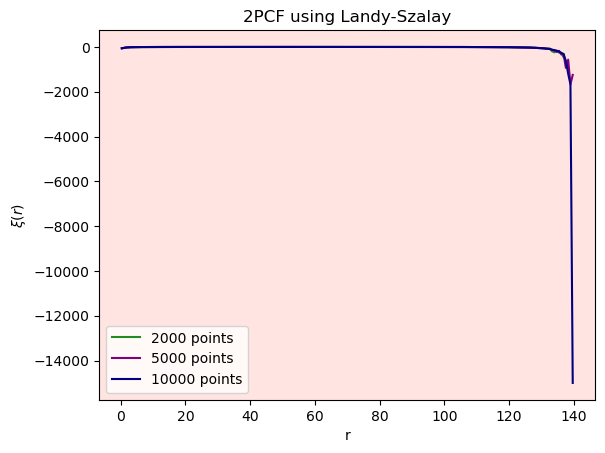

In [45]:
# and the plot for the histogram using the Landy-Szalay estimator is 
est_ls2 = f_ls(DDx2,RRx2,DRx2)
est_ls5 = f_ls(DDx5,RRx5,DRx5)
est_ls10 =f_ls(DDx10,RRx10,DRx10)

fig, ax = plt.subplots()
ax.plot(DD[0], est_ls2, label='2000 points',linestyle='-', color='forestgreen')
ax.plot(DD[0], est_ls5, label='5000 points',linestyle='-', color='purple')
ax.plot(DD[0], est_ls10, label='10000 points',linestyle='-', color='navy')
ax.set_xlabel('r')
ax.set_ylabel('$\\xi(r)$')
ax.set_facecolor('mistyrose')
ax.set_title('2PCF using Landy-Szalay')
ax.legend()


/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: invalid value encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:16: RuntimeWarning: invalid value encountered in true_divide
  return dd/dr -1
/tmp/ipykernel_8799/3403468329.py:23: RuntimeWarning: invalid value encountered in true_divide
  return (dd*rr)/(dr**2)-1
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return (dd - 2*dr +rr)/rr
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: invalid value encountered in true_divide
  return (dd - 2*dr +rr)/rr


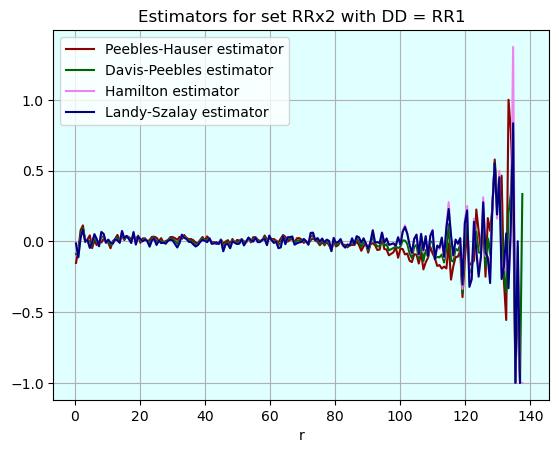

In [34]:
# 2000 pts
DRR1x2 = f_dr(N_b, R, Rx2)
DRR1x2[1] = DRR1x2[1]/sum(DRR1x2[1])
fig, ax = plt.subplots()
ax.plot(RR[0], f_ph(RR,RRx2), color='darkred',label='Peebles-Hauser estimator')
ax.plot(RR[0], f_dp(RR, DRR1x2),color='darkgreen', label='Davis-Peebles estimator')
ax.plot(RR[0], f_h(RR, RRx2,DRR1x2), color='violet',label='Hamilton estimator')
ax.plot(RR[0], f_ls(RR, RRx2, DRR1x2),color='navy',label='Landy-Szalay estimator')
ax.set_xlabel('r')
ax.set_title(' RRx2 with DD = RR1')
ax.set_facecolor('lightcyan')
ax.grid()
ax.legend()


/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: invalid value encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:16: RuntimeWarning: invalid value encountered in true_divide
  return dd/dr -1
/tmp/ipykernel_8799/3403468329.py:23: RuntimeWarning: invalid value encountered in true_divide
  return (dd*rr)/(dr**2)-1
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: invalid value encountered in true_divide
  return (dd - 2*dr +rr)/rr


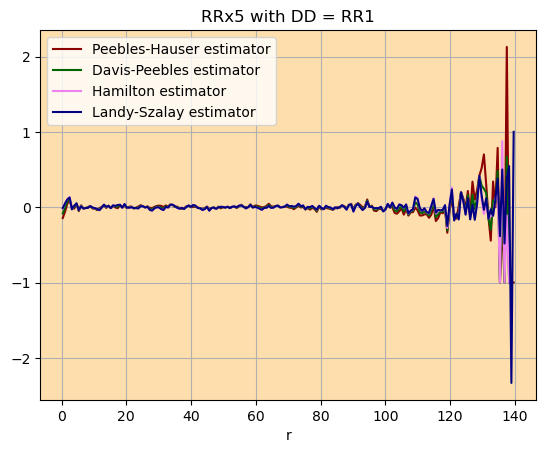

In [35]:



# 5000 pts
DRR1x5 = f_dr(N_b, R, Rx5)
DRR1x5[1] = DRR1x5[1]/sum(DRR1x5[1])
fig, ax = plt.subplots()
ax.plot(RR[0], f_ph(RR,RRx5), color='darkred',label='Peebles-Hauser estimator')
ax.plot(RR[0], f_dp(RR, DRR1x5),color='darkgreen', label='Davis-Peebles estimator')
ax.plot(RR[0], f_h(RR, RRx5,DRR1x5), color='violet',label='Hamilton estimator')
ax.plot(RR[0], f_ls(RR, RRx5, DRR1x5),color='navy',label='Landy-Szalay estimator')
ax.set_xlabel('r')
ax.set_title('RRx5 with DD = RR1')
ax.set_facecolor('navajowhite')
ax.grid()
ax.legend()

/tmp/ipykernel_8799/3403468329.py:9: RuntimeWarning: invalid value encountered in true_divide
  return dd/rr -1
/tmp/ipykernel_8799/3403468329.py:16: RuntimeWarning: invalid value encountered in true_divide
  return dd/dr -1
/tmp/ipykernel_8799/3403468329.py:23: RuntimeWarning: invalid value encountered in true_divide
  return (dd*rr)/(dr**2)-1
/tmp/ipykernel_8799/3403468329.py:31: RuntimeWarning: invalid value encountered in true_divide
  return (dd - 2*dr +rr)/rr


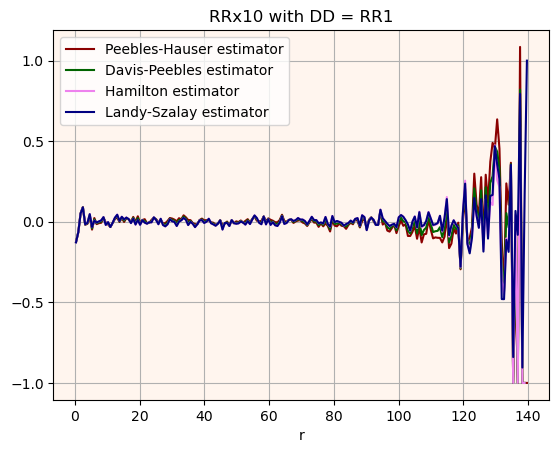

In [38]:
# 10000 pts
DRR1x10 = f_dr(N_b, R, Rx10)
DRR1x10[1] = DRR1x10[1]/sum(DRR1x10[1])
fig, ax = plt.subplots()
ax.plot(RR[0], f_ph(RR,RRx10), color='darkred',label='Peebles-Hauser estimator')
ax.plot(RR[0], f_dp(RR, DRR1x10),color='darkgreen', label='Davis-Peebles estimator')
ax.plot(RR[0], f_h(RR, RRx10,DRR1x10), color='violet',label='Hamilton estimator')
ax.plot(RR[0], f_ls(RR, RRx10, DRR1x10),color='navy',label='Landy-Szalay estimator')
ax.set_xlabel('r')
ax.set_title('RRx10 with DD = RR1')
ax.set_facecolor('seashell')
ax.grid()
ax.legend()